In [1]:
# import libraries needed
import numpy as np
import pandas as pd
import names

In [2]:
NUM_PLAYERS = 100000
NUM_CHEATERS = 5000

In [3]:
# instantiate a player stats dicionary to store different randomly generated stats
player_stats = {}
cheater_stats = {}

In [4]:
names_list = []
for i in range(NUM_PLAYERS):
    names_list.append(names.get_full_name())

cheater_list = []
for i in range(NUM_CHEATERS):
    cheater_list.append(names.get_full_name())

In [5]:
player_stats["names"] = names_list
cheater_stats["names"] = cheater_list

In [6]:
def int_continuous(lower_range_of_stat, upper_range_of_stat, size):
    stat = np.random.randint(
        lower_range_of_stat,
        upper_range_of_stat,
        size=size,
    )
    stat = stat.T
    return stat

In [7]:
def gaussian(mu, sigma, size):
    stat = np.random.normal(
        mu,
        sigma,
        size=size,
    )
    stat = stat.T
    return stat

In [8]:
def log_normal(mu, sigma, size):
    stat = np.random.lognormal(
        mu,
        sigma,
        size=size,
    )
    stat = stat.T
    return stat

In [9]:
def binary_rng(size):
    stat = np.random.choice([0, 1], size=size)
    stat = stat.T
    return stat

In [10]:
player_stats["kd"] = gaussian(3.5, 1.5, NUM_PLAYERS)
cheater_stats["kd"] = gaussian(9, 3, NUM_CHEATERS)

In [11]:
player_stats["level"] = gaussian(35, 8, NUM_PLAYERS)
cheater_stats["level"] = gaussian(25, 5, NUM_CHEATERS)

In [13]:
player_stats["stash_value"] = gaussian(5000000, 1500000, NUM_PLAYERS )
cheater_stats["stash_value"] = gaussian(50000000, 15000000, NUM_CHEATERS)

In [14]:
player_stats["account_type"] = binary_rng(NUM_PLAYERS)
cheater_stats["account_type"] = binary_rng(NUM_CHEATERS)

In [15]:
player_stats["survival_rate"] = gaussian(.3, .07, NUM_PLAYERS)
cheater_stats ["survival_rate"] = gaussian(.7, .1, NUM_CHEATERS)

In [16]:
player_stats["avg_life_span"] = gaussian(18, 7, NUM_PLAYERS)
cheater_stats["avg_life_span"] = gaussian(25, 5, NUM_CHEATERS)

In [17]:
player_stats["account_lifetime"] = gaussian(500, 150, NUM_PLAYERS)
cheater_stats["account_lifetime"] = gaussian(100, 25, NUM_CHEATERS)

In [18]:
player_stats["longest_streak"] = gaussian(7, 2, NUM_PLAYERS)
cheater_stats["longest_streak"] = gaussian(20, 7, NUM_CHEATERS)

In [19]:
player_stats["label"] = (np.full(shape=NUM_PLAYERS, fill_value=0)).T
cheater_stats["label"] = (np.full(shape=NUM_CHEATERS, fill_value=1)).T

In [20]:
df_player = pd.DataFrame.from_dict(player_stats)
df_cheater = pd.DataFrame.from_dict(cheater_stats)

In [21]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'kd'}>,
        <Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'stash_value'}>],
       [<Axes: title={'center': 'account_type'}>,
        <Axes: title={'center': 'survival_rate'}>,
        <Axes: title={'center': 'avg_life_span'}>],
       [<Axes: title={'center': 'account_lifetime'}>,
        <Axes: title={'center': 'longest_streak'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

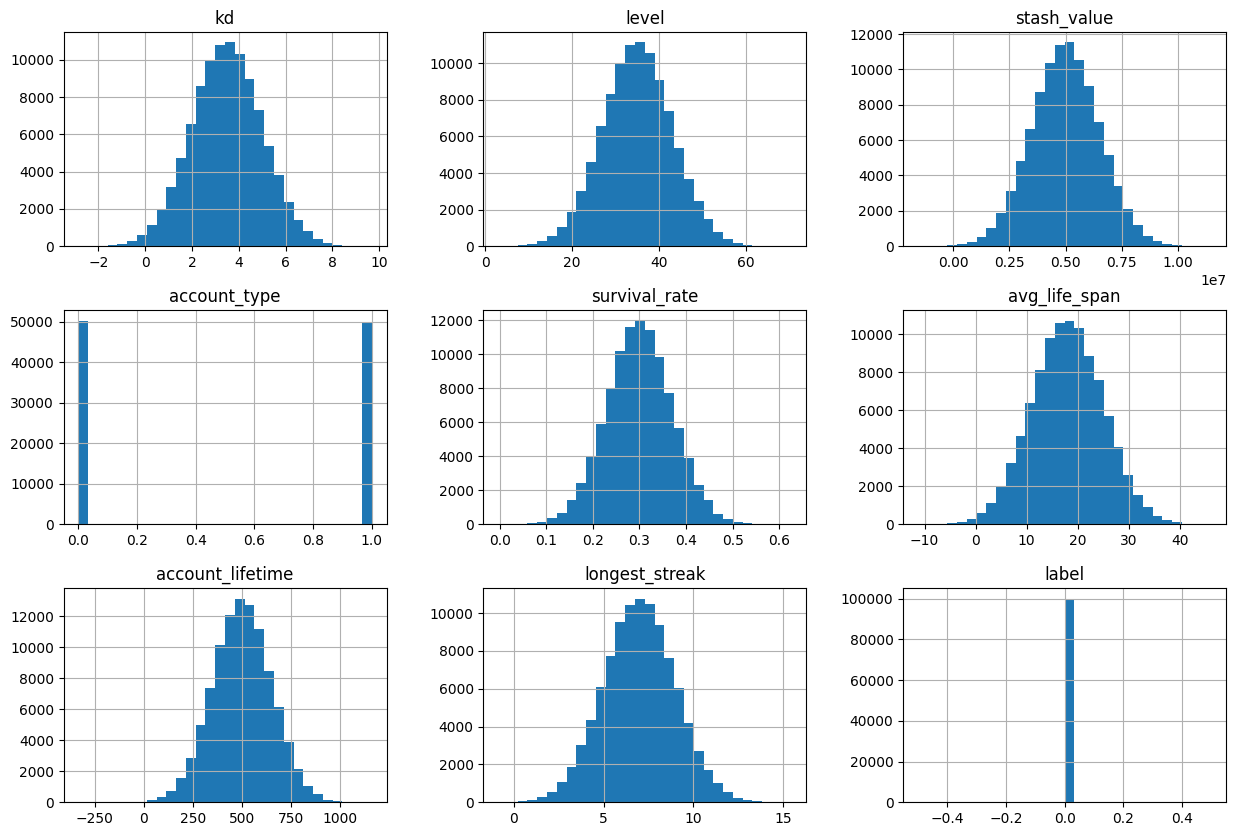

In [22]:
df_player.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': 'kd'}>,
        <Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'stash_value'}>],
       [<Axes: title={'center': 'account_type'}>,
        <Axes: title={'center': 'survival_rate'}>,
        <Axes: title={'center': 'avg_life_span'}>],
       [<Axes: title={'center': 'account_lifetime'}>,
        <Axes: title={'center': 'longest_streak'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

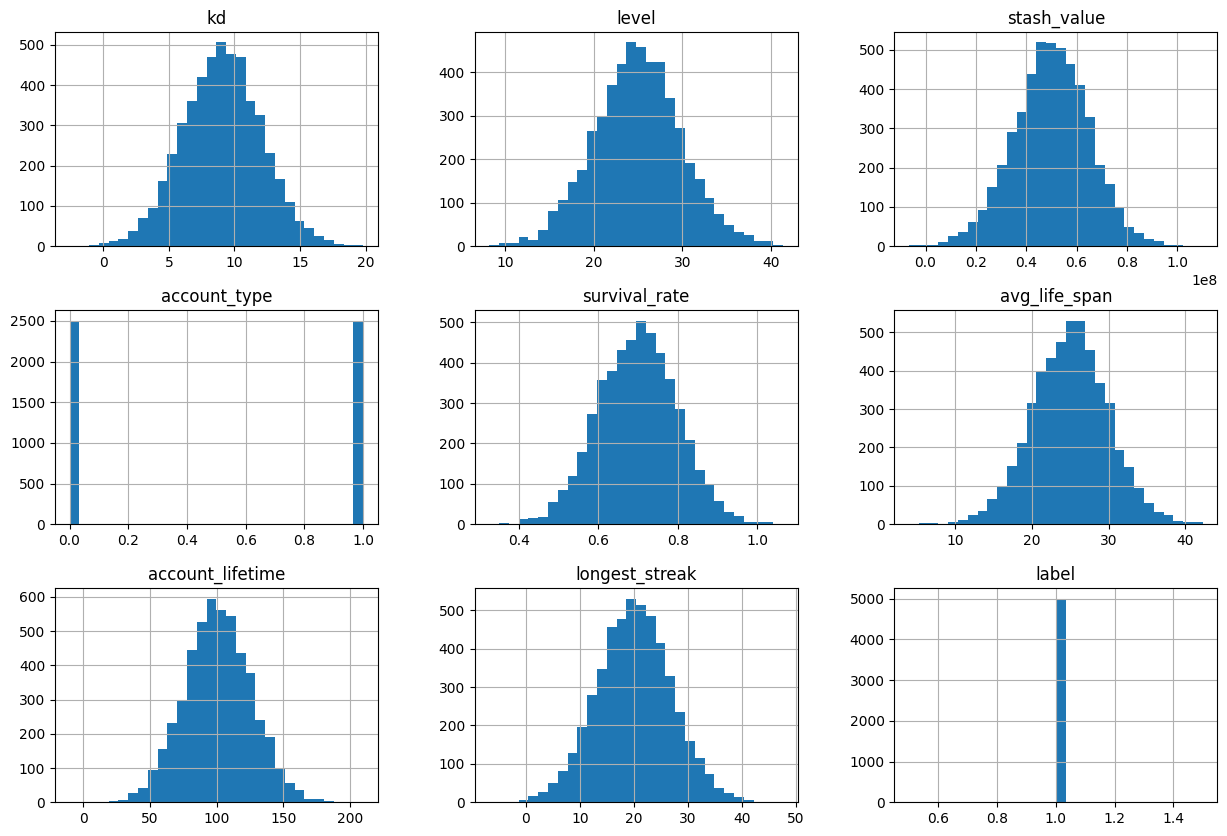

In [23]:
df_cheater.hist(bins=30, figsize=(15, 10))

In [24]:
df = df_player.append(df_cheater)

/var/folders/ks/nz9z_gz54sl8kl28stnkh4hr0000gn/T/ipykernel_64311/2255865097.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_player.append(df_cheater)


In [25]:
# randomly shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   names             105000 non-null  object 
 1   kd                105000 non-null  float64
 2   level             105000 non-null  float64
 3   stash_value       105000 non-null  float64
 4   account_type      105000 non-null  int64  
 5   survival_rate     105000 non-null  float64
 6   avg_life_span     105000 non-null  float64
 7   account_lifetime  105000 non-null  float64
 8   longest_streak    105000 non-null  float64
 9   label             105000 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 8.0+ MB


In [27]:
df.to_csv('data/synthetic_data.csv')

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(["names", "label"], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state=0,
)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp


(19997, 0, 0, 1003)

In [33]:
# misleading in class imabalanced datasets, baseline accuracy would be 1000/1050 = 95.2%
accuracy_score(y_test, y_pred)

1.0

In [34]:
# ability of the classifier to not miss positive samples
precision_score(y_test, y_pred)

1.0

In [35]:
# ability of the classifier not to label as positive a sample that is negative.
recall_score(y_test, y_pred)

1.0